In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load some data in a pandas dataframe

df = None
#df =pd.read_excel("C:/Users/Admin/Pythonprojects/RAMS/data/Oilanalysis.xlsx")                           #for those who would like to work from a local drive  
df = pd.read_excel("https://raw.githubusercontent.com/chrisrijsdijk/RAMS/master/data/Oilanalysis.xlsx")

In [3]:
# check the datatypes in the dataframe to verify that all columns except for "Age" are numerical

#df.dtypes

In [4]:
# get a preview on the data

#df.head(3)
#df.describe()
#len(df["BRSTVD"])

In [5]:
# plot histograms of the data in the dataframe
# causal effects of the columns that just contain one value remain invisible "ceteris paribus"
# check for outliers and explain them eventually

#for col in df.columns: 
#    try:      
#        df[col] = pd.to_numeric(df[col]) 
#        df.hist(column=col)
#    except ValueError:
#        print("The column "+col+' can not be represented as a histogram')

In [6]:
#create a correlation matrix to check for pairwise linear dependencies among the columns

#dummy=df.iloc[:,1:]    #remove the "Age" column that is not numerical
#dummy.corr(min_periods=15)
#plt.matshow(dummy.corr(min_periods=15))
#plt.show()
#print(dummy.columns)

#del dummy

In [7]:
# convert categorical variables into indicator functions

df = pd.get_dummies(df,columns=["Age"])
#df


In [23]:
# define the response variable and convert it into an np.array

y=np.array(df["Age_New"])


In [24]:
#perform k-means clustering to check for nonlinear dependencies among the df columns

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier

from sklearn.inspection import permutation_importance


In [36]:
# define the explanatory variables

X=df.iloc[:,:34]
X_names=df.iloc[:,:34].columns


In [37]:
# impute data in case of NaN's by using K nearest neighbour

imputer = KNNImputer(n_neighbors=20, weights="distance")
X=imputer.fit_transform(X)


In [38]:
# create a training set and a validation set

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, np.arange(len(X)), test_size = 0.25, random_state = None, stratify=y)

#print('X_train Shape:', X_train.shape)
#print('y_train Shape:', y_train.shape)
#print('X_test Shape:', X_test.shape)
#print('Y_test Shape:', y_test.shape)


In [39]:
# Instantiate model with 1000 decision trees

rf = RandomForestClassifier(n_estimators = 1000, criterion="gini",random_state = None)

# Train the model on training data

rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000)

In [40]:
# validate the random forest using the test set

predictions = rf.predict(X_test)


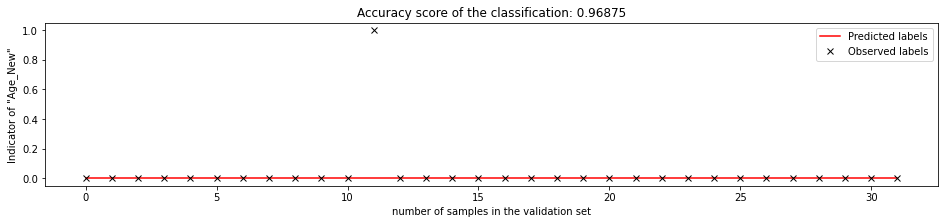

In [41]:
# plot the result of the validation

plt.figure(figsize=(16,3))
plt.plot(range(len(predictions)), predictions, '-', label="Predicted labels", color="red")
plt.plot(range(len(y_test)), y_test, 'x', label="Observed labels",color="black")
plt.title("Accuracy score of the classification: "+str(rf.score(X_test, y_test)))
plt.xlabel('number of samples in the validation set')
plt.ylabel('Indicator of "Age_New"')
plt.legend()
plt.show()


In [42]:
# depict a tree from the forest

#plt.figure(figsize=(10,10))
#clf = rf.estimators_[5]
#tree.plot_tree(clf,feature_names=X_names, filled=True)


In [43]:
#plot the importance of the various explanatory variables using Gini importance

pd.DataFrame(rf.feature_importances_,index=X_names).sort_values(0,ascending=False)


,0
CU,0.121197
VIS99,0.090836
ISO 4406 large,0.090261
VIS40,0.090237
WATER,0.083972
TBN,0.080551
VLAMCC,0.060583
FE,0.046925
ISO 4406 small,0.042201
LNF-ROET,0.040431


In [44]:
#plot the importance of the various explanatory variables using permutation importance
result = permutation_importance(rf, X_test, y_test, n_repeats=30, random_state=None, n_jobs=2)

pd.DataFrame(result.importances_mean, index=X_names).sort_values(0,ascending=False)


,0
BRSTVD,0.0
SN,0.0
MG,0.0
MN,0.0
NA,0.0
NI,0.0
PB,0.0
SI,0.0
ZN,0.0
ISO 4406 large,0.0


In [35]:
#save the result in a csv

dum = df.iloc[idx_test,:].copy()
dum["Prediction of -Age_New-"] =y_test
dum.to_excel("C:/Users/Admin/Pythonprojects/RAMS/notebook/outputRF_testset.xlsx")